# Introducción a Pytorch usando fast.ai: 
# Clasificador de imágenes usando Google Images

*por Alonso Astroza. Inspirado en el curso [Practical Deep Learning for Coders](https://course.fast.ai/)*

Vamos a crear nuestro conjunto de datos usando Google Images. **Nota**: Vamos a repetir pasos para cada categoría que vamos a Googlear.

In [1]:
from fastai.vision import *
print('¡Listo!')

¡Listo!


## Conseguir una lista de URLs

### Buscar y scrollear

Debemos ir a [Google Images](http://images.google.com) y buscar el concepto del que estemos interesados en obtener imagenes. Mientras mas específico seamos serán mejores los resultados que obtendremos.

Hay que scrollear hasta que veamos todas las imágenes que queremos bajar o hasta que se vea el botón que dice: 'Show more results'. Todas las imágenes por las que scrolleamos ahora están disponibles para que las bajemos. El número máximo de imágenes que puede mostrar Google Images es 700.

Es una buena idea poner cosas que queremos excluir de la búsqueda, por ejemplo si estás buscando un lobo de raza específica "canis lupus lupus", puede ser una buena idea excluir otras variantes de lobos:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis


### Bajar las imagenes a un archivo

Debemos correr un código Javascript en el navegador que guardará las URLs de todas las imágenes de nuestro dataset.

En Google Chrome hay que apretar <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>j</kbd> en Windows/Linux y <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>j</kbd> en macOS, y aparecerá la ventana de 'Console' javascript. En Firefox presionando <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>k</kbd> en Windows/Linux o <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>k</kbd> en macOS. Ahí es donde pegamos los comandos  JavaScript.

Antes de correr los comandos probablemente debamos deshabilitar cualquier extensión de ad blocking (uBlock, AdBlockPlus etc.) en Chrome. Si no, el comando window.open() no funciona. Luego se debe correr lo siguiente:

```javascript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### Crear una carperta y subir los archivos con urls al servidor

Debemos escoger un nombre adecuado que sea la etiqueta de cada conjunto de imagenes. Se pueden correr estos comandos varias veces para construir múltiples etiquetas.

In [2]:
path = Path('data')
print('¡Listo!')

¡Listo!


### Clase 1 - //facemask

In [ ]:
#No se ejecuto
folder = 'basketball'
file = 'basketball.csv'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [ ]:
#No se ejecuto
download_images(path/file, dest, max_pics=200)
print('¡Listo!')

### Clase 2 - //face

In [ ]:
#No se ejecuto
folder = 'futbol'
file = 'futbol.csv'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [ ]:
#No se ejecuto
download_images(path/file, dest, max_pics=200)
print('¡Listo!')

La siguiente celda debemos correrla una vez por cada categoría.

In [3]:
path.ls()

[WindowsPath('data/basketball'),
 WindowsPath('data/futbol'),
 WindowsPath('data/models'),
 WindowsPath('data/rugby'),
 WindowsPath('data/tenis1.jpeg'),
 WindowsPath('data/tennis')]

Finalmente tenemos que subir nuestros .csv con las urls si es que no lo hemos guardado en la misma data carpeta. Para eso hay que apretar el botón `Upload` en el directorio de trabajo y seleccionar el archivo, luego hacer click en `Upload`' por cada uno de los archivos que se desplieguen. O simplemente copiarlos en el directorio `data` en el navegador de archivos de su sistema operativo.


## Bajar las imágenes

Ahora necesitaremos bajar las imagenes desde sus respectivas urls.

fast.ai tiene una función que permite hacer exactamente eso. Solo debemos especificarle el archivo con las urls así como una carpeta de destino, con eso la función va a bajar todas las imágenes que pueda abrir. Si tiene algún problema tratando de abrir algún archivo, simplemente se lo salta y no lo baja.

¡Así que bajemos las imágenes! Notemos que podemos elegir el número máximo de imágenes a bajar. En este caso no vamos a bajar todas las urls para que los conjuntos de datos sean más acotados.

Necesitamos correr la línea de la bajada de imágenes una vez por cada categoría.

In [4]:
classes = ['basketball','futbol','tennis','rugby']

Luego podemos remover las imágenes que no puedan abrirse como imágen propiamente tal:

In [5]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

print('¡LISTO!')

basketball


futbol


tennis


rugby


¡LISTO!


## Ver los datos

In [6]:
np.random.seed(2)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

C:\Users\goang\.conda\envs\fastai\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
C:\Users\goang\.conda\envs\fastai\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default 

Aprovechemos de mirar las imagenes que bajamos

In [7]:
data.classes

['basketball', 'data', 'futbol', 'rugby', 'tennis']

C:\Users\goang\.conda\envs\fastai\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
C:\Users\goang\.conda\envs\fastai\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default 

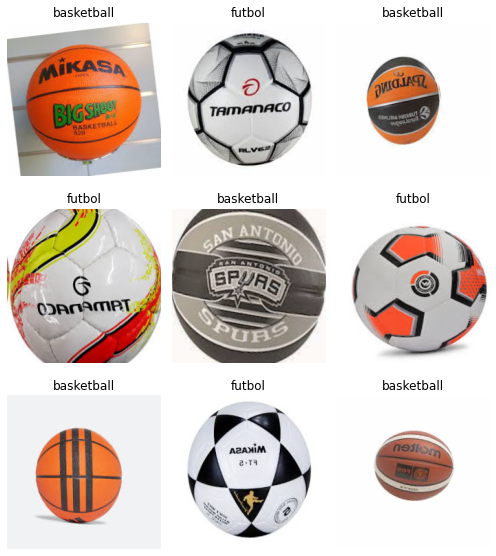

In [8]:
data.show_batch(rows=3, figsize=(7,8))

In [9]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['basketball', 'data', 'futbol', 'rugby', 'tennis'], 5, 530, 132)

## Entrenar el modelo

Para entrenar el modelo usaremos una [red neuronal convolucional](https://cs231n.github.io/convolutional-networks/) (resnet34). Por el momento lo necesario de saber es que estaremos construyendo un modelo que toma imágenes de entrada y como salida predice la probabilidad de que pertenezca a cada categoría.

Entrenaremos por 4 épocas (4 ciclos por todos los datos).

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
print('¡Listo!')

¡Listo!


In [11]:
learn.model
print('¡Listo!')

¡Listo!


In [12]:
learn.fit_one_cycle(4)
print('¡Listo!')

epoch,train_loss,valid_loss,error_rate,time
0,2.244216,0.843778,0.325758,00:43
1,1.363185,0.288377,0.068182,00:40
2,0.919827,0.203372,0.053030,00:41
3,0.686842,0.166664,0.053030,00:39


¡Listo!


In [13]:
learn.save('stage-1')

## Resultados

Veamos los resultados que obtuvimos.

Primero miraremos si lo que predijo el modelo es razonable o no. Si no obtiene resultados que son descabellados es un buen indicador que el clasificador esta funcionando bien.

Además graficaremos la matriz de confusión.

In [14]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

print('¡Listo!')

¡Listo!


C:\Users\goang\.conda\envs\fastai\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
C:\Users\goang\.conda\envs\fastai\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default 

¡Listo!


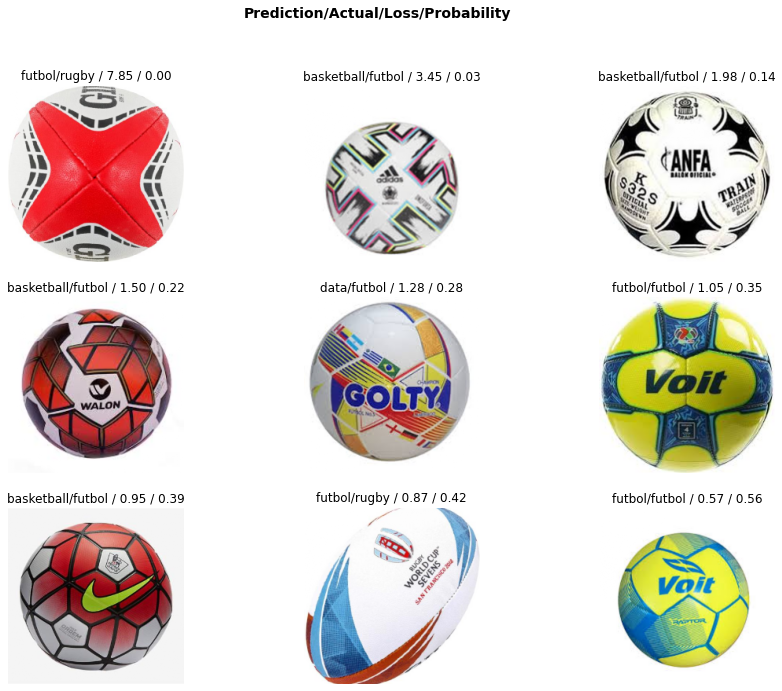

In [15]:
interp.plot_top_losses(9, figsize=(15,11))

print('¡Listo!')

¡Listo!


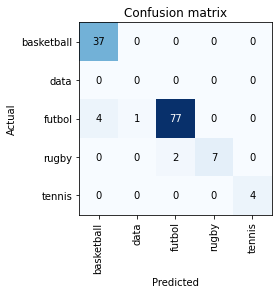

In [16]:
interp.plot_confusion_matrix()

print('¡Listo!')

## Poniendo el modelo en producción

Primero hay que exportar el contenido del objeto `Learner` para usarlo en producción:

In [17]:
learn.export()

print('¡Listo!')

¡Listo!


Esto va a crear un archivo llamado 'export.pkl' en el directorio de trabajo que contiene todo lo necesario para publicar nuestro modelo (el modelo, los pesos de la red y alguna metadata como las clases o las transformaciones/normalizaciones realizadas).

Para predecir basta con usar la CPU, excepto a escala masiva (o entrenamiento en línea). Si la máquina donde publicaremos el modelo no tiene GPU, el cambio a CPU se realizará de manera automática. Tambien podemos probar el modelo en CPU de esta forma:

In [18]:
defaults.device = torch.device('cpu')

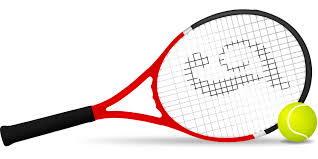

In [19]:
img = open_image(path/'tenis1.jpeg')   #se indica la imagen de prueba, la cual debe estar dentro de data.
img

En el entorno de producción creamos el objeto `Learner` de esta manera, solo hay que asegurarse que el directorio `path` contenga el archivo 'export.pkl' que creamos recién.

In [20]:
learn = load_learner(path)

print('¡Listo!')

¡Listo!


In [21]:
pred_class,pred_idx,outputs = learn.predict(img)
str(pred_class)
print("El resultado es :",str(pred_class))

El resultado es : tennis


In [22]:
outputs

tensor([5.8689e-03, 3.8895e-02, 3.6815e-10, 2.5311e-04, 9.5498e-01])

In [23]:
import secrets  #el que crea la selección alaeatoria según el deporte resultante.

In [24]:
# pred_class puede tomar los siguientes valores: basketball ; futbol ; tennis ; rugby ;

deporte = str(pred_class)

print(deporte)

# Futbol
if deporte=='futbol' :
    dc_futbol = [ 
        'Chile logró el quinto lugar en el primer mundial de fútbol, jugado en Uruguay en 1930. Participaron 13 selecciones.', 'El partido entre selecciones internacionales con más goles de toda la historia del fútbol fue el que disputaron Australia y Samoa Americana el 11 de abril de 2001. El resultado final fue Australia 31 - Samoa Americana 0.' , 'El primer partido de fútbol que fue transmitido en vivo por televisión fue en 1937. Se trató de un amistoso entre el equipo titular y suplente de Arsenal, en abril de aquel año.' , 'El brasileño Ronaldinho Gaúcho, uno de los jugadores más importantes de la historia del fútbol, se dio a conocer a sus 13 años de edad. ¿Por qué? Pues porque marcó 23 goles en un sólo partido, en el cual su equipo ganó precisamente 23 a 0.' 
    ]
    resultado_futbol = secrets.choice(dc_futbol)
    print("El dato curioso es: ",resultado_futbol)

# Basquetball
elif deporte=='basketball':
    dc_basketball = [
        'En 1967 los “mates” eran ilegales, se legalizaron luego en 1976.', 'Michael Jordan es considerado el mejor jugador de la historia del baloncesto en el mundo, y las cifras lo demuestran, ya que se convirtió en leyenda al anotar 5.987 puntos en su carrera profesional.', 'El baloncesto llegó a ser juego olímpico por primera vez en las Olimpiadas de Alemania de 1936.', 'Los triples datan de 1933 pero fueron aprovados en partidos oficiales en 1968.'
    ]
    resultado_basketball = secrets.choice(dc_basketball)
    print("El dato cursio es: ",resultado_basketball)

# Tennis
elif deporte=='tennis':
    dc_tennis = [
        'El partido más largo de la historia ocurrió en Wimbledon 2010 y en él se enfrentaban el estadounidense John Isner y el francés Nicolas Mahut. En total duró 11 horas, 5 minutos y 23 segundos, y se disputaron 183 juegos. El ganador fue John Isner.', 'Serena Williams y Venus Williams, de EEUU, son las primeras hermanas en ganar una medalla olímpica en tenis.', '«Tenis» viene de «tennis» en inglés, que viene de la palabra francesa «tenez». Se le designó esa palabra ya que cuando los jugadores lanzaban la pelota decían: «tenez», que significa ¡ahí va!.', 'El tenis moderno es la evolución del Real Tenis, un deporte que nació en Francia y que se llamaba «el juego de la palma». Se practicaba en lugares con superficies de madera o piedra.'
    ]
    resultado_tennis = secrets.choice(dc_tennis)
    print("El dato cursio es: ",resultado_tennis)

# Rugby
elif deporte=='rugby':
    dc_rugby = [
        'Podría decirse que el equipo más famoso del rugby es el All Blacks de Nueva Zelanda. Ganaron la primera Copa Mundial de Rugby que se celebró en 1987 y son más conocidos por realizar el Haka antes de cada partido.' , 'Como las pelotas de rugby originalmente se fabricaban con vejigas de cerdo y se inflaban solo con la respiración, era posible que alguien se enfermara por hacer estallar vejigas enfermas. De hecho, la mujer de Richard Lindon (quien produjo pelotas para la Escuela de Rugby durante la década de 1800), murió a causa de la explosión de muchas vejigas enfermas.' , 'El silbato que se usa para abrir todos los partidos de rugby de la Copa del Mundo hasta la fecha es el mismo que se usó en el partido de Inglaterra contra Nueva Zelanda de 1905 por el árbitro galés Gil Evans.' , 'Originalmente, las pelotas de rugby tenían la forma de una ciruela ya que estaban hechas con vejigas de cerdo que tenían esta forma. Con el tiempo, el material se deformaba hasta acabar adoptando esa forma ovalada con la que ahora las conocemos.'
    ]
    resultado_rugby = secrets.choice(dc_rugby)
    print("El dato cursio es: ",resultado_rugby)

tennis
El dato cursio es:  «Tenis» viene de «tennis» en inglés, que viene de la palabra francesa «tenez». Se le designó esa palabra ya que cuando los jugadores lanzaban la pelota decían: «tenez», que significa ¡ahí va!.
